In [132]:
import pandas as pd

df = pd.read_csv("data3.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [133]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


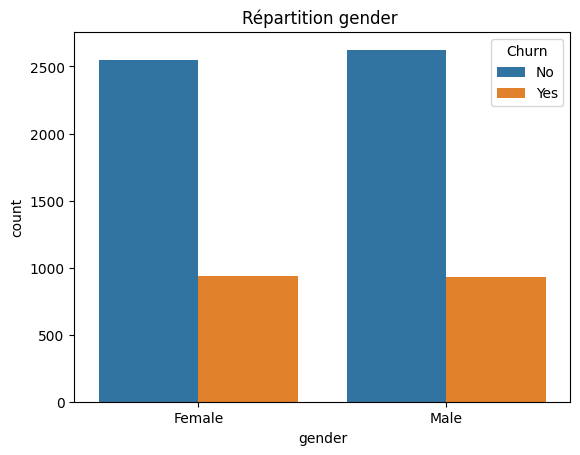

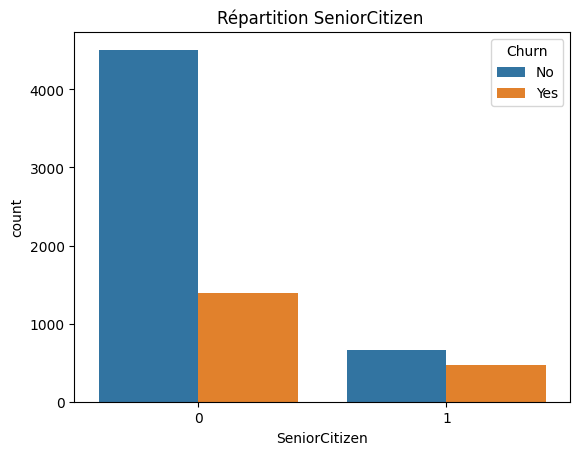

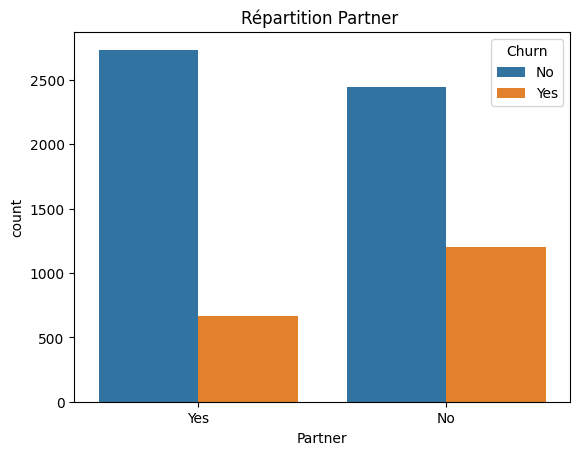

In [134]:
from matplotlib import pyplot as plt
import seaborn as sns

def Countplot(column):
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'Répartition {column} ')
    plt.show()

Countplot('gender')
Countplot('SeniorCitizen')
Countplot('Partner')


<Axes: >

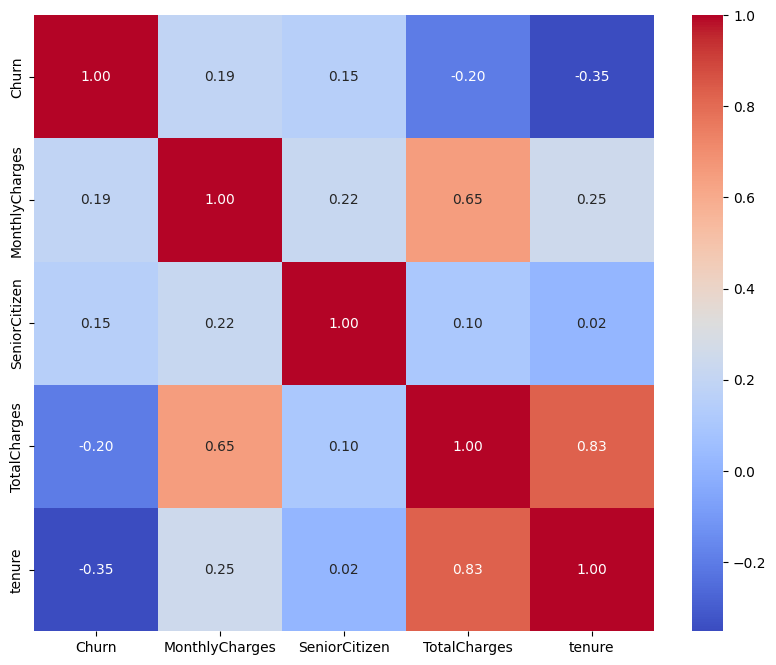

In [135]:
# Cell 7 : corr matrix
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert Churn to numeric
plt.figure(figsize=(10,8))
corr = df[num_cols.union(pd.Index(['Churn', 'TotalCharges']))].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')


In [136]:
from sklearn.preprocessing import LabelEncoder
# Liste des colonnes catégorielles

columns_to_encode = ['Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaperlessBilling', 'PaymentMethod']
for col in columns_to_encode: 
    encoder=LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    print(f"Colonne encodée: {col}")
    print(df[col].value_counts())
    print("-" * 50)



Colonne encodée: Dependents
Dependents
0    4933
1    2110
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: PhoneService
PhoneService
1    6361
0     682
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: MultipleLines
MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: InternetService
InternetService
1    3096
0    2421
2    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: OnlineSecurity
OnlineSecurity
0    3498
2    2019
1    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: OnlineBackup
OnlineBackup
0    3088
2    2429
1    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: DeviceProtection
DeviceProtection
0    3095
2    2422
1    1526
Name: count, dtype: int64
-----

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Sélection des colonnes numériques pour la normalisation
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features].fillna(0)
y = df['Churn'].fillna(0)

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Prédictions
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Évaluation du modèle
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1036
           1       0.57      0.47      0.51       373

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entraînement du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409

